NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.9)
Adam(0.9, 0.9)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.9)
Adam(0.9, 0.9)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.9)
Adam(0.9, 0.9)


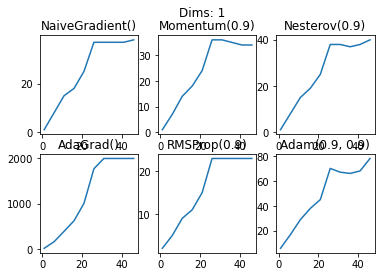

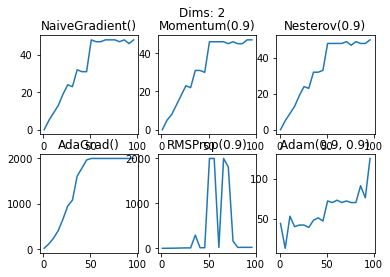

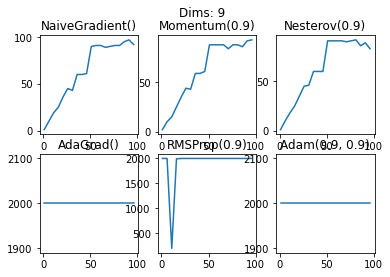

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from criteria import CountStopLossCriteria
from gradient import *
from graphic import F, F10d, F3d, G
from loss import AbsoluteLoss

for graphic in [F(), F3d(), F10d()]:
    count_points = graphic.points_x.shape[0]
    batch_sizes = [i for i in range(1, count_points + 1, 5)]
    n = graphic.linear.n + 1

    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f"Dims: {graphic.linear.n}")

    i_idx = 0
    j_idx = 0

    for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
                AdaGrad(n), RMSProp(n, 0.9), Adam(n, 0.9, 0.9)]:
        print(str(grad))

        w = np.array([0] * (graphic.linear.n + 1))
        epoches = np.array([gradient(graphic, 0.1, w, AbsoluteLoss(), 2000,
                                     batch_size, CountStopLossCriteria(16), 1e-4, grad)[0]
                                for batch_size in batch_sizes])

        axs[j_idx, i_idx].set_title(str(grad))
        axs[j_idx, i_idx].plot(batch_sizes, epoches)

        i_idx += 1
        j_idx += i_idx // 3
        i_idx %= 3

    plt.show()